In [43]:
import numpy as np
import pandas as pd

data = pd.read_csv('movies_reviews_dataset/reviews.csv')
data.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [0]:
X = data['review']
y = data['sentiment']
X = X.str.lower()
y = y.replace(to_replace='positive', value=1)
y = y.replace(to_replace='negative', value=0)

In [67]:
import nltk
nltk.download('stopwords')
stop_words = ['i',
 'me','my','myself','we','our','ours','ourselves','you',
 "you're","you've","you'll","you'd",'your','yours','yourself','yourselves','he',
 'him','his','himself','she',"she's",'her',
 'hers','herself','it',"it's",'its','itself','they',
 'them','their','theirs','themselves','what','which','who',
 'whom','this','that',"that'll",'these','those','am','is','are','was','were',
 'be','been','being','have','has','had',
 'having','do','does','did','doing','a','an','the','and','but','if',
 'or','because','as','until','while','of','at','by','for',
 'with','about','against','between','into','through','during','before','after','above',
 'below','to','from','up','down','in','out','on','off','over','under',
 'again','further','then','once','here','there','when','where','why',
 'how','all','any','both','each','few','more','most','other', 'some', 'such',]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
for i in range (len(X)):
  temp = X[i].split()
  if len(temp) > 220:
    temp = temp[:120]
  temp = [word for word in temp if not word in stop_words]
  X[i] = " ".join(temp)
  if (i%10000 == 0 or i==49999) and i != 0:
    print(i)

10000
20000
30000
40000
49999


In [0]:
vocab_size = 15000
oov_tok = "<OOV>"
max_length = 80 #the maximum length of review text

In [26]:
import nltk
nltk.download('stopwords')
nltk.download('word_tokenize')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading word_tokenize: Package 'word_tokenize' not
[nltk_data]     found in index


False

In [0]:
stop_words = nltk.corpus.stopwords.words('english')

In [0]:
check = "one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked."
check = [word for word in check if word not in stop_words]

In [85]:
X.head(5)

0    one reviewers mentioned watching just 1 oz epi...
1    wonderful little production. <br /><br />the f...
2    thought wonderful way spend time too hot summe...
3    basically there's family little boy (jake) thi...
4    petter mattei's "love time money" visually stu...
Name: review, dtype: object

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(X)
padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

In [87]:
len(word_index)

93435

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42)
y_train, y_test = y_train.values, y_test.values

In [0]:
#hyperparameters
embedding_dim = 100
num_epochs = 10

In [0]:
import tensorflow as tf

In [35]:
total_words = len(tokenizer.word_index)
total_words

124253

In [101]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, 100, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 80, 100)           1500100   
_________________________________________________________________
bidirectional_21 (Bidirectio (None, 80, 128)           84480     
_________________________________________________________________
dropout_4 (Dropout)          (None, 80, 128)           0         
_________________________________________________________________
bidirectional_22 (Bidirectio (None, 64)                41216     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_30 (Dense)             (None, 1)               

In [102]:
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/10
1250/1250 [==============================] - 122s 98ms/step - loss: 0.3892 - accuracy: 0.8222 - val_loss: 0.3384 - val_accuracy: 0.8586
Epoch 2/10
1250/1250 [==============================] - 120s 96ms/step - loss: 0.2388 - accuracy: 0.9051 - val_loss: 0.3333 - val_accuracy: 0.8575
Epoch 3/10
1250/1250 [==============================] - 119s 96ms/step - loss: 0.1351 - accuracy: 0.9503 - val_loss: 0.4145 - val_accuracy: 0.8493
Epoch 4/10
1250/1250 [==============================] - 119s 96ms/step - loss: 0.0694 - accuracy: 0.9761 - val_loss: 0.4813 - val_accuracy: 0.8368
Epoch 5/10
1250/1250 [==============================] - 119s 95ms/step - loss: 0.0407 - accuracy: 0.9866 - val_loss: 0.6737 - val_accuracy: 0.8416
Epoch 6/10
1250/1250 [==============================] - 119s 95ms/step - loss: 0.0310 - accuracy: 0.9896 - val_loss: 0.7171 - val_accuracy: 0.8278
Epoch 7/10
1250/1250 [==============================] - 119s 95ms/step - loss: 0.0227 - accuracy: 0.9923 - val_loss: 0

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

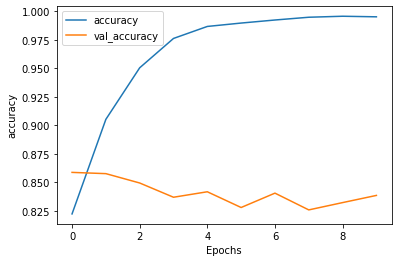

In [103]:
plot_graphs(history, 'accuracy')

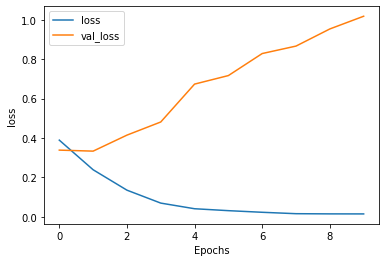

In [104]:
plot_graphs(history, 'loss')

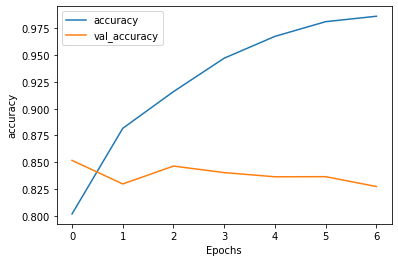

In [0]:
plot_graphs(history, 'accuracy')

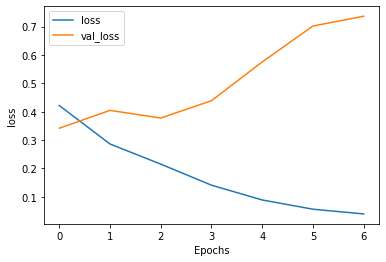

In [0]:
plot_graphs(history, 'loss')

In [135]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(X_train[3])

basically there's family little boy jake thinks there's zombie closet parents fighting time br br this movie slower than soap opera suddenly jake decides become rambo kill zombie br br ok first going make film must decide thriller drama drama movie watchable parents <OOV> arguing like real life jake closet totally ruins film expected see boogeyman similar movie instead watched drama meaningless thriller spots br br 3 10 just well playing parents descent dialogs shots jake just ignore them ?
[ 1659   176  3250     1   360  3564 12311  1899     1 11796  8325     1
  1164     1   356   880    47  4733 12055 10685 13882     1    34    47
  4538   503     9   534  2898 14690  3250  8914   140    38     1 14560
     1  1500   798    21   929  1711   948  1279  4017   471   739   208
  1283  1747  1690   471   480  1217   408     5   802 13682   745   699
  1224     1   181   371    54     1  5721  2741  1657  3425  1553  3530
    69   112    61    65   548     4   191    16]


In [136]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(15001, 100)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

### Lets try another model

In [0]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
conv_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
conv_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 100)          1000000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 116, 128)          64128     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 1,064,909
Trainable params: 1,064,909
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = conv_model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/7
1250/1250 [==============================] - 18s 15ms/step - loss: 0.3889 - accuracy: 0.8214 - val_loss: 0.3323 - val_accuracy: 0.8568
Epoch 2/7
1250/1250 [==============================] - 19s 15ms/step - loss: 0.2702 - accuracy: 0.8882 - val_loss: 0.3590 - val_accuracy: 0.8483
Epoch 3/7
1250/1250 [==============================] - 19s 15ms/step - loss: 0.2210 - accuracy: 0.9123 - val_loss: 0.3734 - val_accuracy: 0.8457
Epoch 4/7
1250/1250 [==============================] - 18s 14ms/step - loss: 0.1767 - accuracy: 0.9342 - val_loss: 0.4114 - val_accuracy: 0.8399
Epoch 5/7
1250/1250 [==============================] - 18s 14ms/step - loss: 0.1331 - accuracy: 0.9528 - val_loss: 0.4608 - val_accuracy: 0.8356
Epoch 6/7
1250/1250 [==============================] - 18s 14ms/step - loss: 0.0923 - accuracy: 0.9688 - val_loss: 0.5580 - val_accuracy: 0.8336
Epoch 7/7
1250/1250 [==============================] - 18s 14ms/step - loss: 0.0633 - accuracy: 0.9781 - val_loss: 0.6702 - val_ac

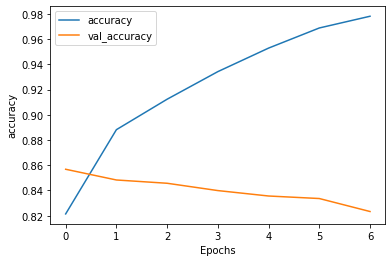

In [0]:
plot_graphs(history, 'accuracy')

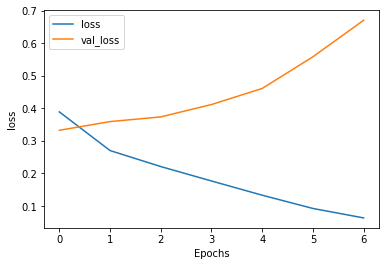

In [0]:
plot_graphs(history, 'loss')

In [0]:
def prepare_to_prediction(text): #text should be np.array type
  text[0] = text[0].lower()
  temp = text[0].split()
  temp = [word for word in temp if not word in stop_words]
  text[0] = " ".join(temp)
  t_sequence = tokenizer.texts_to_sequences(text)
  t_padded = pad_sequences(t_sequence, maxlen=max_length, padding='post', truncating='post')
  return t_padded

In [0]:
text = np.array(["i really hate this film. the actor was bad and in general it was boring. my wife also disliked the film as it was horrible"])
text = prepare_to_prediction(text)

In [134]:
predicted_number = model.predict(text)[0][0]
print(round(predicted_number, 4))

0.0
